**Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:**

- LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
- SEX: пол клиента (1 = мужской, 2 = женский )
- EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
- MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
- AGE: возраст в годах
- PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
- BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь
- PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
- default - индикатор невозврата денежных средств

In [43]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [4]:
data = pd.read_csv('credit_card_default_analysis.csv')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


**Задание**

1. Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: 
**a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки** 

In [5]:
data.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [8]:
default = data[data.default == 1].LIMIT_BAL.values
nondefault = data[data.default == 0].LIMIT_BAL.values

In [10]:
median1 = np.median(default)
median2 = np.median(nondefault)

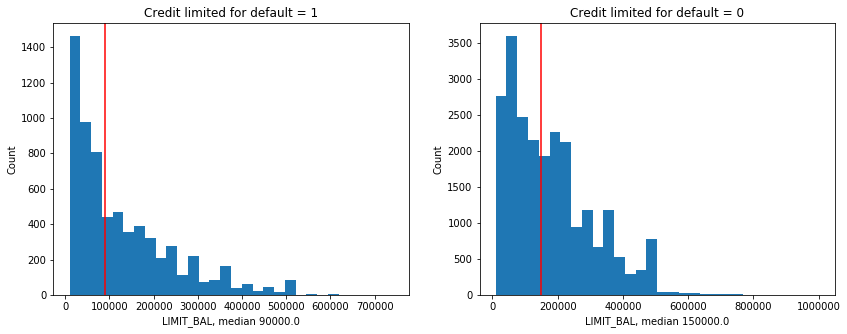

In [28]:
plt.figure(figsize=(14, 5))
ind = 0
for value in (default, nondefault):
    plt.subplot(1, 2, ind+1)
    plt.hist(value, bins = 30)
    plt.axvline(np.median(value), color='r')
    plt.xlabel('LIMIT_BAL, median {}'.format(np.median(value)))
    plt.ylabel('Count')
    plt.title('Credit limited for default = {}'.format(np.abs(1-ind)))
    ind+=1

Заметно что распределения для двух выборов не известны. Для проверки гипотезы о равенстве медианных значений кредитного лимита используем интервальной оценки на основе бутстрепа:

In [29]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha=0.05):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [31]:
np.random.seed(0)

df_med_scores = list(map(np.median, get_bootstrap_samples(default, 1000)))
nondf_med_scores = list(map(np.median, get_bootstrap_samples(nondefault, 1000)))

print("95% confidence interval for default median limit credit: ", stat_intervals(df_med_scores, 0.05))
print("95% confidence interval for nondefault median limit credit: ", stat_intervals(nondf_med_scores, 0.05))


95% confidence interval for default median limit credit:  [80000. 90000.]
95% confidence interval for nondefault median limit credit:  [150000. 150000.]


- Данные интервалы не пересекаются

In [37]:
# Интервальная оценка
median_scores = list(map(lambda x: x[1] - x[0], zip(df_med_scores, nondf_med_scores)))
print("95% confidence interval for diffirence median: ", stat_intervals(median_scores, 0.05))

95% confidence interval for diffirence median:  [60000. 70000.]


- Интервал не содержит 0, можем отвергнуть гипотезу о равентсве медианных значений кредитного лимита в двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1).

**b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?**

### Перестановочный критерий
$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [46]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in list(range(max_combinations - 1)):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

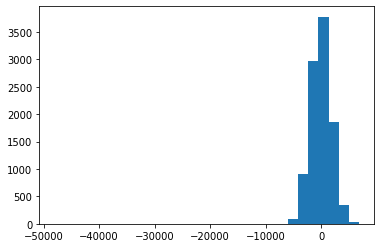

In [48]:
plt.hist(permutation_zero_dist_ind(default, nondefault, max_combinations=10000), bins=30)
plt.show()

In [52]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [53]:
print("p-value: {}".format(permutation_test(nondefault, default, max_permutations = 10000)))

p-value: 0.0001


- Значение p-value намного меньше 0.05, нулевая гипотеза отвергается. Распределния не равны.

С практической точки зрения, полученные результаты значимы.

**2. Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)**

In [55]:
data.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [62]:
#Таблица сопряженности
pivot_table = data.pivot_table(index='default', values='LIMIT_BAL', columns='SEX', aggfunc=len)
pivot_table

SEX,1,2
default,,
0,9015,14349
1,2873,3763


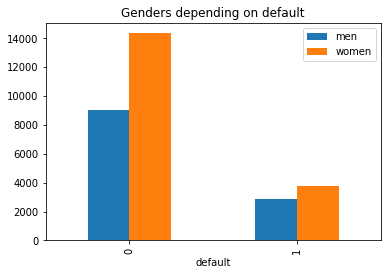

In [66]:
pivot_table.plot.bar()
plt.xlabel('default')
plt.title('Genders depending on default')
plt.legend(['men', 'women'])

plt.show()

Выборки независимые. Проверим нолевую гипотезу:


$H_0$: гендерный состав групп совпадает <br />
$H_1$: гендерный состав групп различается

In [80]:
df_sex = data[data.default == 0].SEX
nondf_sex = data[data.default == 1].SEX


In [81]:
mapping = {1:1, 2:0}
nondf_sex = [mapping[i] for i in nondf_sex ]
df_sex = [mapping[i] for i in df_sex]

In [82]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [83]:
print("confidence interval: ", proportions_confint_diff_ind(df_sex, nondf_sex, alpha=0.05))

confidence interval:  (-0.060548077974896725, -0.03363493274962867)


- Доверительный интеравал для разности долей мужчин и женщин не содержит нуля; гендерный состав групп вернувших кредит и не вернувших кредит различный.

**3. Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?**

In [84]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [86]:
df_edu = data[data.default == 1].EDUCATION
nondf_edu = data[data.default == 0].EDUCATION

In [108]:
table_edu = data.pivot_table(index='default', values='LIMIT_BAL', columns='EDUCATION', aggfunc=len, fill_value=0)
table_edu

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,14,8549,10700,3680,116,262,43
1,0,2036,3330,1237,7,18,8


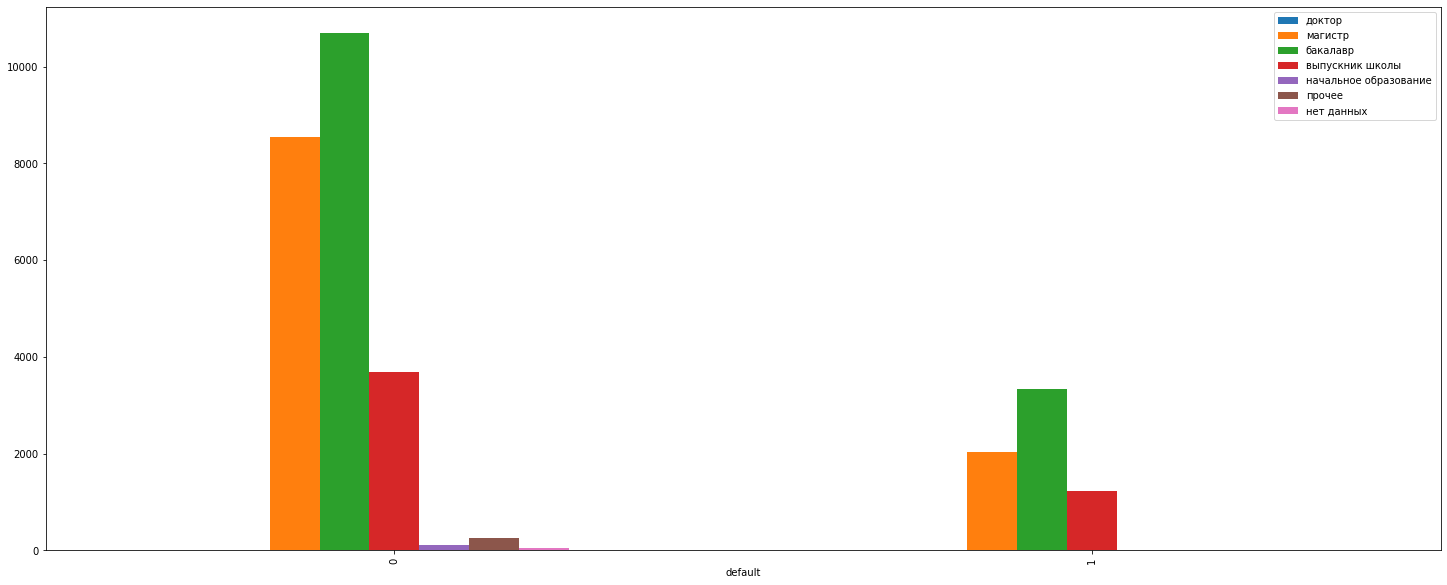

In [123]:
edu_names = ['доктор', 'магистр', 'бакалавр', 'выпускник школы', 'начальное образование', 'прочее', 'нет данных ']
table_edu.plot.bar(figsize=(25, 10))
plt.legend(edu_names)
plt.show()

$H_0$: уровень образования не влияет на возврат кредита <br />
$H_1$: влияет

Проверку гипотезы будем осуществлять с помощью критерия хи-квадрат.

Убедимся в правомерности применения статистики хи-квадрат в соответствии с правилами:
* количество объектов в таблице сопряжённости $$n \geq 40$$
* ожидаемое количество элементов в таблице $${n_{i+} n_{+j} \over n} < 5 \text{ не более, чем в 20% случаев}$$

In [111]:
chi2, pval, dof, ex = stats.chi2_contingency(table_edu.values)
print('p-value: ', pval)

p-value:  1.2332626245415605e-32


На уровне значимости 0.05 нулевая гипотеза отвергается

- Посмотрим доли не вернувших долг кождого класса

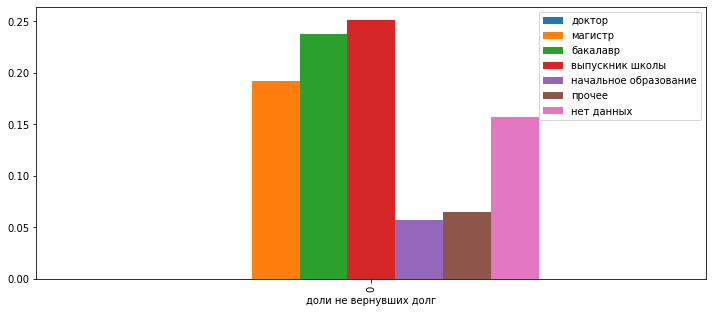

In [135]:
dol_edu = (table_edu.loc[1]) / ((table_edu.loc[0] + table_edu.loc[1]))
dol_edu_table = pd.DataFrame(np.array(dol_edu).reshape(1,7), columns= table_edu.columns)
dol_edu_table.plot.bar(figsize=(12,5))
plt.xlabel('доли не вернувших долг')
plt.legend(edu_names)
plt.show()

Хуже всего возвращают кредиты люди с образованием "выпускник школы" и "бакалавр", лучше всего - доктора

**4. Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.**

In [136]:
mar_names = ["refused", "married", "single", "N/A"]
data.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [137]:
table_mar = data.pivot_table(index='default', 
     values="LIMIT_BAL", columns='MARRIAGE', aggfunc = len, fill_value=0)
table_mar.head()

MARRIAGE,0,1,2,3
default,,,,
0,49,10453,12623,239
1,5,3206,3341,84


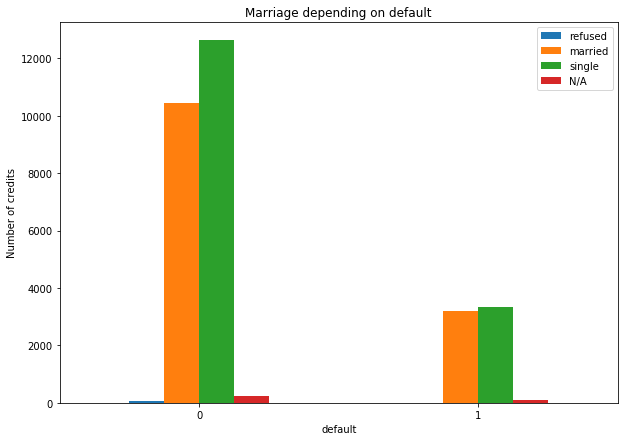

In [139]:
table_mar.plot.bar(rot=0, figsize=(10, 7))
plt.xlabel("default")
plt.ylabel("Number of credits")
plt.title("Marriage depending on default")
plt.legend(mar_names)
plt.show()

In [141]:
chi2, p, dof, exp = stats.chi2_contingency(table_mar)

n = table_mar.sum(axis = 0).sum()
cr_v = (chi2 / n) ** 0.5

print('Cramer\'s V: ', cr_v)
print('p-value: ', p)

Cramer's V:  0.034478203662766466
p-value:  8.825862457577375e-08


По значению p-value отвергаем нулевую гипотезу. Исходя из значения коэффициента Крамера корреляция не очень значительна.

На уровне значимости 0.05 семейное положение заёмщика не связано с возвратом или неозвратом им кредита.

**5. Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?**

In [142]:
df_age = data[data.default == 1].AGE.values
nondf_age = data[data.default == 0].AGE.values

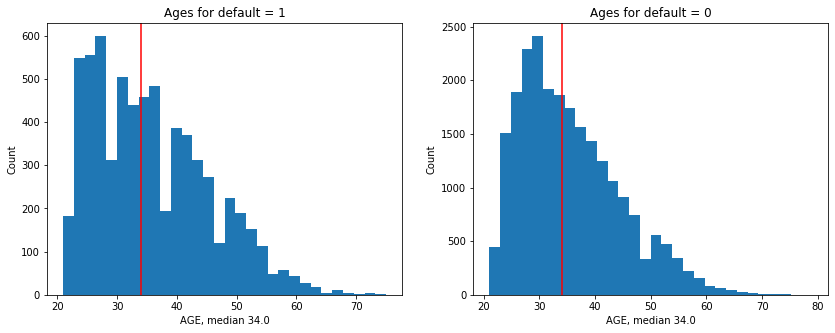

In [143]:
plt.figure(figsize=(14, 5))
ind = 0
for value in (df_age, nondf_age):
    plt.subplot(1, 2, ind+1)
    plt.hist(value, bins = 30)
    plt.axvline(np.median(value), color='r')
    plt.xlabel('AGE, median {}'.format(np.median(value)))
    plt.ylabel('Count')
    plt.title('Ages for default = {}'.format(np.abs(1-ind)))
    ind+=1

In [144]:
np.random.seed(0)

df_med_age_scores = list(map(np.median, get_bootstrap_samples(df_age, 1000)))
nondf_med_age_scores = list(map(np.median, get_bootstrap_samples(nondf_age, 1000)))

print("95% confidence interval for default median limit credit: ", stat_intervals(df_med_age_scores, 0.05))
print("95% confidence interval for nondefault median limit credit: ", stat_intervals(nondf_med_age_scores, 0.05))

95% confidence interval for default median limit credit:  [34. 35.]
95% confidence interval for nondefault median limit credit:  [34. 34.]


Данные интервалы пересекаются

In [147]:
# Интервальная оценка
median_age_scores = list(map(lambda x: x[1] - x[0], zip(df_med_age_scores, nondf_med_age_scores)))
print("95% confidence interval for diffirence median: ", stat_intervals(median_age_scores, 0.05))

95% confidence interval for diffirence median:  [-1.  0.]


Видим, что доверительный интервал содержит ноль, отсюда можно предположить что медианы значимо не отличаются. 

Применим Перестановочный критерий для проверки равенства средних:

- H_0 - средние равны
- H_1 - средние не равны

In [148]:
print("p-value: {}".format(permutation_test(nondf_age, df_age, max_permutations = 10000)))

p-value: 0.0174


Значение p-value меньше уровня значимости 0.05, мы можем отвергнуть нулевую гипотезу.